In [1]:
library(tidyverse)
library(fable)
library(tsibble)
library(readxl)
library(ggplot2)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: fabletools


Attaching package: 'tsibble'


The following object is masked from 'package:lubridate':

    interval


The following objects are masked from 'package:base':

    intersect, setdiff, union




In [2]:
df <- read_csv("Temperatura.csv")
df

Rows: 239177 Columns: 7
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (4): City, Country, Latitude, Longitude
dbl  (2): AverageTemperature, AverageTemperatureUncertainty
date (1): dt

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
<date>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-06-01,24.844,1.402,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-07-01,24.058,1.254,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-08-01,23.576,1.265,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-09-01,23.662,1.226,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [3]:
str(df)

spc_tbl_ [239,177 x 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ dt                           : Date[1:239177], format: "1849-01-01" "1849-02-01" ...
 $ AverageTemperature           : num [1:239177] 26.7 27.4 28.1 26.1 25.4 ...
 $ AverageTemperatureUncertainty: num [1:239177] 1.44 1.36 1.61 1.39 1.2 ...
 $ City                         : chr [1:239177] "Abidjan" "Abidjan" "Abidjan" "Abidjan" ...
 $ Country                      : chr [1:239177] "Côte D'Ivoire" "Côte D'Ivoire" "Côte D'Ivoire" "Côte D'Ivoire" ...
 $ Latitude                     : chr [1:239177] "5.63N" "5.63N" "5.63N" "5.63N" ...
 $ Longitude                    : chr [1:239177] "3.23W" "3.23W" "3.23W" "3.23W" ...
 - attr(*, "spec")=
  .. cols(
  ..   dt = col_date(format = ""),
  ..   AverageTemperature = col_double(),
  ..   AverageTemperatureUncertainty = col_double(),
  ..   City = col_character(),
  ..   Country = col_character(),
  ..   Latitude = col_character(),
  ..   Longitude = col_character()
  .. )
 - attr(*, 

Warning message:
"Removed 3 rows containing missing values (`geom_line()`)."


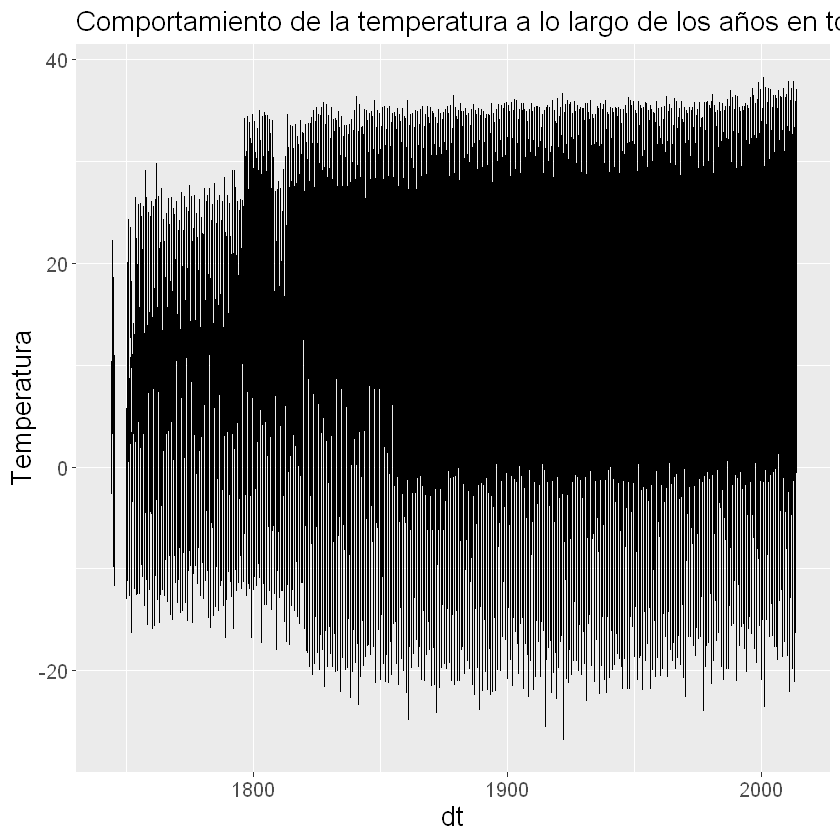

In [4]:
df %>%
  ggplot(aes(x = dt, y = AverageTemperature)) +
  geom_line() +
  labs(y = "Temperatura", title = "Comportamiento de la temperatura a lo largo de los años en todo el mundo")+
  theme(
    text = element_text(size = 14), 
    axis.title = element_text(size = 16), 
    axis.text = element_text(size = 12),  
    legend.title = element_text(size = 14), 
    legend.text = element_text(size = 12)  
  )

In [7]:
df$dt = as.Date(df$dt, origin = "1849-01-01")

In [8]:
seq_dates <- seq(from = min(df$dt), to = max(df$dt), by = "1 month")
library(lubridate)

In [9]:
df$dt = yearmonth(df$dt)
tail(df)

dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
<mth>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
2013 Apr,12.563,1.823,Xian,China,34.56N,108.97E
2013 May,18.979,0.807,Xian,China,34.56N,108.97E
2013 Jun,23.522,0.647,Xian,China,34.56N,108.97E
2013 Jul,25.251,1.042,Xian,China,34.56N,108.97E
2013 Aug,24.528,0.840,Xian,China,34.56N,108.97E
2013 Sep,NA,NA,Xian,China,34.56N,108.97E


In [10]:
# Seleccionar columnas por nombre
# Columnas seleccionadas
selected_columns <- c('dt', 'AverageTemperature')

# Crear un nuevo dataframe con las columnas seleccionadas
column_df <- subset(df, select = selected_columns)
column_df

dt,AverageTemperature
<mth>,<dbl>
1849 Jan,26.704
1849 Feb,27.434
1849 Mar,28.101
1849 Apr,26.140
1849 May,25.427
1849 Jun,24.844
1849 Jul,24.058
1849 Aug,23.576
1849 Sep,23.662


In [11]:
column_df$AverageTemperature = as.numeric(column_df$AverageTemperature)
head(column_df, 2)

dt,AverageTemperature
<mth>,<dbl>
1849 Jan,26.704
1849 Feb,27.434


In [12]:
str(column_df)

tibble [239,177 x 2] (S3: tbl_df/tbl/data.frame)
 $ dt                : mth [1:239177] 1849 Jan, 1849 Feb, 1849 Mar, 1849 Apr, 1849 May, 1849 ...
 $ AverageTemperature: num [1:239177] 26.7 27.4 28.1 26.1 25.4 ...


In [13]:
data = as_tsibble(column_df, index=dt, regular=TRUE)
head(data, 2)

ERROR: [1m[33mError[39m in `validate_tsibble()`:[22m
[33m![39m A valid tsibble must have distinct rows identified by key and index.
[34mi[39m Please use `duplicates()` to check the duplicated rows.


## Graficas estacionales

In [23]:
df %>% gg_season(AvgTemperature, labels = "both") +
    ggtitle('Remesas por año') + ylab('Temperatura') + xlab('Año')

ERROR: Error in gg_season(., AvgTemperature, labels = "both"): could not find function "gg_season"


In [23]:
train <- df %>% select(AverageTemperature) %>% filter_index("2000 Jan" ~ "2013 Sep")
test <- df %>% select(AverageTemperature) %>% filter_index("2013 Oct" ~ "2023 Dec")
tstng_prds <- 6
frcst_prds <- 6

ERROR: [1m[33mError[39m in `not_tsibble()`:[22m
[33m![39m x is not a tsibble.


In [20]:
models_fit <- train %>% 
    model(`Seasonal naive` = SNAIVE(AverageTemperature))
models_tst <- models_fit %>% forecast(h = tstng_prds)
mape_sn <- (models_fit %>% forecast(h = tstng_prds) %>% accuracy(test))$MAPE
snaive_plot <- models_tst %>% autoplot(filter_index(df, "2000" ~ .)) +
    ggtitle('Seasonal Naive') + ylab('Temperatura') + xlab('Año')

snaive_plot

ERROR: Error in model(., `Seasonal naive` = SNAIVE(AvgTemperature)): object 'train' not found
